In [7]:
import os
import re
import nltk
from pprint import pprint
from pathlib import Path
import numpy as np

import pandas as pd
from pprint import pprint

#by this option we disable the possibility of a bad dataframe representation
pd.set_option('display.expand_frame_repr', False)

In [16]:
validation_df = pd.read_csv("final_validation.csv")
validation_df

,sdg,extracted_title,extracted_abstract,initial_text,prediction_by_title,Titles_Matched,prediction_by_abstract,Abstracts_Matched,prediction_by_text,Texts_Matched
0,SDG7,Solid oxide fuel cell hybrid system: A detaile...,This paper reports a review of an environmenta...,Solid oxide fuel cell hybrid system: A detaile...,SDG7,True,SDG13,False,SDG7,True
1,SDG10,"How do oil prices, macroeconomic factors and p...",The aim of this study is to determine the natu...,"How do oil prices, macroeconomic factors and p...",SDG3,False,SDG10,True,SDG10,True
2,SDG10,A comprehensive indicator set for measuring mu...,"In this paper, we develop a quantitative indic...",A comprehensive indicator set for measuring mu...,SDG10,True,SDG3,False,SDG3,False
3,SDG10,Foreign direct investment and renewable energy...,Climate change mitigation is a topical issue w...,Foreign direct investment and renewable energy...,SDG13,False,SDG10,True,SDG13,False
4,SDG10,Energy storage and multi energy systems in loc...,This study investigates how a district with a ...,Energy storage and multi energy systems in loc...,SDG10,True,SDG10,True,SDG10,True
...,...,...,...,...,...,...,...,...,...,...
94,SDG13,Dual stresses of flooding and agricultural lan...,Global climate change is leading to a signific...,Dual stresses of flooding and agricultural lan...,SDG13,True,SDG13,True,SDG13,True
95,SDG13,Trend of extreme rainfall events using suitabl...,Kolkata Metropolitan Area (KMA) is one of the ...,Trend of extreme rainfall events using suitabl...,SDG13,True,SDG13,True,SDG13,True
96,SDG13,"Grounding line, ice frontal position and coast...",Over the past 20 years satellite remote sensin...,"Grounding line, ice frontal position and coast...",SDG13,True,SDG13,True,SDG13,True
97,SDG13,"It's not (just) “the environment, stupid!” Val...",This exploratory mixed-methods study uses in-d...,"It's not (just) “the environment, stupid!” Val...",SDG13,True,SDG13,True,SDG13,True


In [17]:
validation_df['New_ID'] = validation_df.index + 880

In [22]:
data=[]
for file in sorted(os.listdir('test_set')):
        data.append( file)

df = pd.DataFrame(data, columns=['Filename'])
df
df['ID'] = df.index + 880
df

,Filename,ID
0,ABC_G1B1_10.1016_j.energy.2018.11.091.txt,880
1,ABC_G1B2_10.1016_j.apenergy.2018.01.084.txt,881
2,ABC_G1B2_10.1016_j.enpol.2020.111284.txt,882
3,ABC_G1B2_10.1016_j.jclepro.2020.121262.txt,883
4,ABC_G1B2_10.1016_j.renene.2020.05.131.txt,884
...,...,...
94,RST_G7B4_10.1016_j.scitotenv.2020.txt,974
95,RST_G7B4_10.1016_j.uclim.2020.100599.txt,975
96,RST_G7B4_PANGAEA.884782.txt,976
97,RST_G7B4_S0959378012001288.txt,977


In [23]:
df_val = pd.merge(df,validation_df, how='inner', on=[df['ID'], validation_df['New_ID']])
df_val

,key_0,key_1,Filename,ID,sdg,extracted_title,extracted_abstract,initial_text,prediction_by_title,Titles_Matched,prediction_by_abstract,Abstracts_Matched,prediction_by_text,Texts_Matched,New_ID
0,880,880,ABC_G1B1_10.1016_j.energy.2018.11.091.txt,880,SDG7,Solid oxide fuel cell hybrid system: A detaile...,This paper reports a review of an environmenta...,Solid oxide fuel cell hybrid system: A detaile...,SDG7,True,SDG13,False,SDG7,True,880
1,881,881,ABC_G1B2_10.1016_j.apenergy.2018.01.084.txt,881,SDG10,"How do oil prices, macroeconomic factors and p...",The aim of this study is to determine the natu...,"How do oil prices, macroeconomic factors and p...",SDG3,False,SDG10,True,SDG10,True,881
2,882,882,ABC_G1B2_10.1016_j.enpol.2020.111284.txt,882,SDG10,A comprehensive indicator set for measuring mu...,"In this paper, we develop a quantitative indic...",A comprehensive indicator set for measuring mu...,SDG10,True,SDG3,False,SDG3,False,882
3,883,883,ABC_G1B2_10.1016_j.jclepro.2020.121262.txt,883,SDG10,Foreign direct investment and renewable energy...,Climate change mitigation is a topical issue w...,Foreign direct investment and renewable energy...,SDG13,False,SDG10,True,SDG13,False,883
4,884,884,ABC_G1B2_10.1016_j.renene.2020.05.131.txt,884,SDG10,Energy storage and multi energy systems in loc...,This study investigates how a district with a ...,Energy storage and multi energy systems in loc...,SDG10,True,SDG10,True,SDG10,True,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,974,974,RST_G7B4_10.1016_j.scitotenv.2020.txt,974,SDG13,Dual stresses of flooding and agricultural lan...,Global climate change is leading to a signific...,Dual stresses of flooding and agricultural lan...,SDG13,True,SDG13,True,SDG13,True,974
95,975,975,RST_G7B4_10.1016_j.uclim.2020.100599.txt,975,SDG13,Trend of extreme rainfall events using suitabl...,Kolkata Metropolitan Area (KMA) is one of the ...,Trend of extreme rainfall events using suitabl...,SDG13,True,SDG13,True,SDG13,True,975
96,976,976,RST_G7B4_PANGAEA.884782.txt,976,SDG13,"Grounding line, ice frontal position and coast...",Over the past 20 years satellite remote sensin...,"Grounding line, ice frontal position and coast...",SDG13,True,SDG13,True,SDG13,True,976
97,977,977,RST_G7B4_S0959378012001288.txt,977,SDG13,"It's not (just) “the environment, stupid!” Val...",This exploratory mixed-methods study uses in-d...,"It's not (just) “the environment, stupid!” Val...",SDG13,True,SDG13,True,SDG13,True,977


In [25]:
df_val=df_val[['Filename','prediction_by_title','Titles_Matched','prediction_by_abstract','Abstracts_Matched','prediction_by_text','Texts_Matched']]
df_val

,Filename,prediction_by_title,Titles_Matched,prediction_by_abstract,Abstracts_Matched,prediction_by_text,Texts_Matched
0,ABC_G1B1_10.1016_j.energy.2018.11.091.txt,SDG7,True,SDG13,False,SDG7,True
1,ABC_G1B2_10.1016_j.apenergy.2018.01.084.txt,SDG3,False,SDG10,True,SDG10,True
2,ABC_G1B2_10.1016_j.enpol.2020.111284.txt,SDG10,True,SDG3,False,SDG3,False
3,ABC_G1B2_10.1016_j.jclepro.2020.121262.txt,SDG13,False,SDG10,True,SDG13,False
4,ABC_G1B2_10.1016_j.renene.2020.05.131.txt,SDG10,True,SDG10,True,SDG10,True
...,...,...,...,...,...,...,...
94,RST_G7B4_10.1016_j.scitotenv.2020.txt,SDG13,True,SDG13,True,SDG13,True
95,RST_G7B4_10.1016_j.uclim.2020.100599.txt,SDG13,True,SDG13,True,SDG13,True
96,RST_G7B4_PANGAEA.884782.txt,SDG13,True,SDG13,True,SDG13,True
97,RST_G7B4_S0959378012001288.txt,SDG13,True,SDG13,True,SDG13,True


In [26]:
print(validation_df["Titles_Matched"].value_counts())
print(validation_df["Abstracts_Matched"].value_counts())
print(validation_df["Texts_Matched"].value_counts())

True     91
False     8
Name: Titles_Matched, dtype: int64
True     86
False    13
Name: Abstracts_Matched, dtype: int64
True     90
False     9
Name: Texts_Matched, dtype: int64


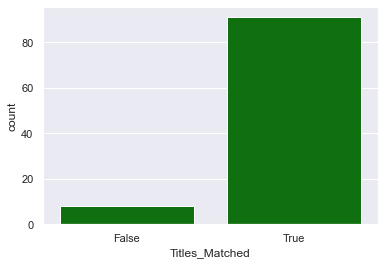

In [27]:
import seaborn as sns
sns.set()
sns.countplot(validation_df["Titles_Matched"], color='green')

#validation_df["Matched"].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

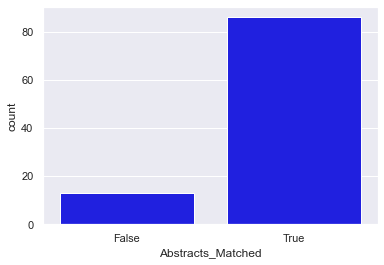

In [28]:
sns.set()
sns.countplot(validation_df["Abstracts_Matched"], color='blue')


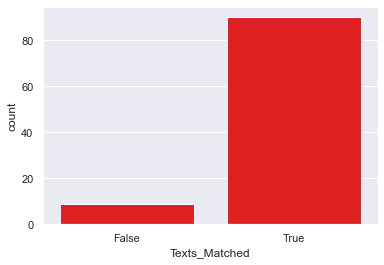

In [29]:
sns.set()
sns.countplot(validation_df["Texts_Matched"], color='red')


In [31]:
print(validation_df['Titles_Matched'].value_counts(normalize=True) * 100)
print(validation_df['Abstracts_Matched'].value_counts(normalize=True) * 100)
print(validation_df['Texts_Matched'].value_counts(normalize=True) * 100)

True     91.919192
False     8.080808
Name: Titles_Matched, dtype: float64
True     86.868687
False    13.131313
Name: Abstracts_Matched, dtype: float64
True     90.909091
False     9.090909
Name: Texts_Matched, dtype: float64


___________________________________________________________________________________

We end up having 79/99 matched sdg documents, which is a percentage of 79.79% accuracy

___________________________________________________________________________________